# Week 11
## Random walks and Markov Processess

This weeks exercises are on random walks and markov processes. Note that the exercise this week are slightly more extensive than earlier weeks, with subexercises that build on each other.

In Lecture L20 (Thursday 08.11) we will devote some time to going through these exercises and discuss them. It it is therefore highly encouraged to at least try to solve these exercises before then.



### Exercise 1) Root Mean Square Displacement of a Random Walker

In the lecture, we found that the *average* displacement of a balanced random walker is

$$\langle X_N \rangle = 0,$$

in both 1D and 2D. This is because the walker has equal chances to go in either direction. However, the averaged *root mean square* displacement, is not 0. Instead, it is
$$ \sqrt{\langle X_N^2 \rangle} = \sqrt{N}, \quad \mbox{1-d}.$$

#### Exercise 1a) Performing random walks

Use `np.random.randint` and `np.cumsum` to perform 1000 random walks of 500 steps each. 

#### Exercise 1b) Plotting the walks

Plot all 1000 walks into the same plot. Let the x-axis denote the number of steps taken, and the y-axis the displacement of the walkers. Use the `alpha` keyword to `plt.plot` to make the different trajectories slightly transparent

#### Exercise 1c) Computing the mean displacement and root mean square displacement

Find the average displacement and the root mean square displacement, of your 1000 walkers. Do these values seem reasonable?

#### Exercise 1d) Plotting in the root mean square displacement

Go back to your plot from 1b) and draw in the root mean square displacement $\sqrt{N}$ into the plot. Does it look reasonable?

### Moving to 2D

We now move to a 2D random walker, that walks in both directions simultaneously, i.e., it performs one of the moves:

$$\vec{r}_n \in \{(1, 1), (1, -1), (-1, 1), (-1, -1)\}.$$

As this walker is symmetric in both $x$ and $y$, the mean displacement should still be 0

$$\langle R_N\rangle = 0.$$

The root mean square displacement however, is slightly different. The mean square displacement is given by

$$\langle \vec{R}_N^2 \rangle = \langle X_N^2 + Y_N^2 \rangle = \langle X_N^2 \rangle + \langle Y_N^2 \rangle.$$

But the the displacements $X_N$ and $Y_N$ behave just like in the 1D case (for each step they move either up or down one step). Thus the mean square displacement of a 2D walker is

$$\langle \vec{R}_N^2 \rangle = \langle X_N^2 \rangle + \langle Y_N^2 \rangle = N + N = 2N.$$

And the root mean square displacement is
$$\langle \vec{R}_N^2 \rangle = \sqrt{2N}.$$

#### Exercise 1e) Performing a 2D walk

Perform a single 2D walk with 1000 steps. Plot the full trajectory of the walk as a 2D plot. Use `plt.axis('equal')` so that the $x$- and $y$-axis are of equal scale.

Also draw in the root mean square displacement as a circle. To draw a circle with matplotlib you can for example use parametric equations:
```Python
theta = np.linspace(0, 2*np.pi, 1001)
plt.plot(radius*np.cos(theta), radius*np.sin(theta), 'k--')
```

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000

steps = 2*np.random.randint(2, size=(N, 2)) - 1

X = np.cumsum(steps[:, 0])
Y = np.cumsum(steps[:, 1])

plt.plot(X, Y)
plt.axis('equal')

radius = np.sqrt(2*N)
theta = np.linspace(0, 2*np.pi, 1001)
plt.plot(radius*np.cos(theta), radius*np.sin(theta), 'k--')

plt.show()

<Figure size 640x480 with 1 Axes>

#### Exercise 1f) The root square displacement over time

Now compute the distance from the walker to the origin for each step. Plot this distance over time, by having the step count $N$ on the $x$-axis, and the distance to the origin on the $y$-axis.

Also plot in the root mean square displacment we expect, $\sqrt{2N}$ as a dashed blacked line.

Note that we do not expect the trajectory of the single walker to match the dashed line, as the dashed line is the average behavior of a huge number of walkers.

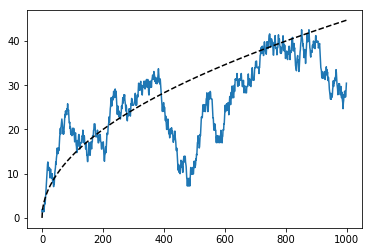

In [4]:
d = np.sqrt(X**2 + Y**2)
plt.plot(range(N), d)
plt.plot(range(N), np.sqrt(2*np.arange(N)), 'k--')
plt.show()

#### Exercise 1g) Increasing the number of walkers

Now model 5 independent walkers, each performing a 2D walk with 1000 steps. Plot all 5 walkers into a 2D plot like the type you made in 1e). 


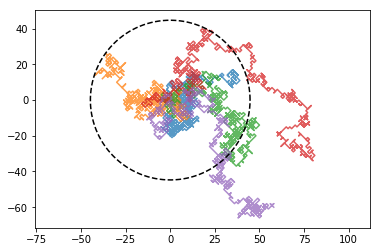

In [5]:
N = 1000

for walker in range(5):
    steps = 2*np.random.randint(2, size=(N, 2)) - 1
    X = np.cumsum(steps[:, 0])
    Y = np.cumsum(steps[:, 1])

    plt.plot(X, Y, alpha=0.75)
    plt.axis('equal')

radius = np.sqrt(2*N)
theta = np.linspace(0, 2*np.pi, 1001)
plt.plot(radius*np.cos(theta), radius*np.sin(theta), 'k--')

plt.show()

#### Exercise 1h) The mean square displacement

Now go back and repeated your plot from 1f), but this time with all 5 walkers. Also draw in a the average of the 5 walkers as a seperate line. Does the average of the 5 walkers come close to the expected root mean square displacement?

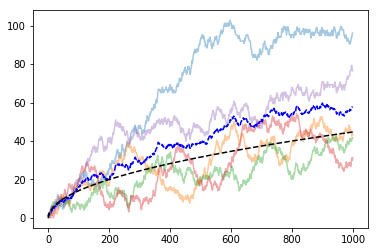

In [6]:
N = 1000
walkers = 5

steps = 2*np.random.randint(2, size=(N, 2, walkers)) - 1
walks = np.cumsum(steps, axis=0)

displacement = np.sqrt(walks[:, 0, :]**2 + walks[:, 1, :]**2)

for walker in range(5):
    plt.plot(range(N), displacement[:, walker], alpha=0.4)

plt.plot(range(N), np.mean(displacement, axis=1), 'b--')    
plt.plot(range(N), np.sqrt(2*np.arange(N)), 'k--')
plt.show()

### Exercise 2) Chutes and Ladders

In this exercise, we will model a game of [*Chutes and Ladders*](https://en.wikipedia.org/wiki/Snakes_and_Ladders) also known as *Snakes and ladders*, or *Stigespillet* in Norwegian.

<img src="https://upload.wikimedia.org/wikipedia/en/b/ba/Cnl03.jpg">

In Chutes and Ladders, players take turns throwing a six-sided die, and move the resulting number of steps on the board. If they hit a square that is the start of a ladder, they instantly move ahead on the board. If they hit the start of a chute, they move back on the board. The goal of the game is to be the first placer to hit the end of the board. The movements of a player's piece on the board of Chutes and Ladders is effectively a *random walk* process.


This exercise is based on project work for a [course made by professor Hans Ekkehard Plesser](https://bitbucket.org/heplesser/nmbu_inf200_h18/wiki/Home), and is used under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/3.0/"></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/3.0/">Creative Commons Attribution-NonCommercial-ShareAlike 3.0 Unported License</a>. Changes have been made to the materials.

#### Exercise 2a) Simulating a single game with no chutes/ladders

Let us start by simulating a single game with a single player. The player starts outside the board, on a virutal square "0". Not play progresses by the player throwing a six-sided die, and moving the given number of squares up on the board. The player is finished when they reach square 100 or above.

Using a loop, simulate this process, keeping track of the number of die rolls you need to get to the end.

In [7]:
position = 0
rolls = 0
while position < 100:
    position += np.random.randint(1, 7)
    rolls += 1
print(rolls)

33


#### Exercise 2b) Adding the Chutes and the Ladders

If, after moving, the player hits the start of a ladder or chute, they should move to a different square. Implement all the chutes and ladders as a dictionary (or two). After rolling and moving the player, check if they landed at the start of a ladder or chute, and if so, move them to the end of that chute/ladder.

**Ladders**

| From | To   |
| -----| ---- |
| 1    |  38  |
| 4    |  14  |
| 9    |  31  |
| 21   |  42  |
| 28   |  84  |
| 36   |  44  |
| 51   |  67  |
| 71   |  91  |
| 80   |  100 |

**Chutes**

| From | To   |
| -----| ---- |
| 16   |  6   |
| 47   |  26  |
| 49   |  11  |
| 56   |  53  |
| 62   |  19  |
| 64   |  60  |
| 87   |  24  |
| 93   |  73  |
| 95   |  75  |
| 98   |  78  |

Add these to your code, and then play a new game from start to finish, printing out how many die-rolls you need to get to the end.



In [8]:
ladders = { 1: 38,
            4: 14,
            9: 31,
           21: 42,
           28: 84,
           36: 44,
           51: 67,
           71: 91,
           80: 100}

chutes = {16: 6,
          47: 26,
          49: 11,
          56: 53,
          62: 19,
          64: 60,
          87: 24,
          93: 73,
          95: 75,
          98: 78}

position = 0
rolls = 0
while position < 100:
    position += np.random.randint(1, 7)
    if position in ladders:
        position = ladders[position]
    elif position in chutes:
        position = chutes[position]
    rolls += 1
    
print(rolls)

56


#### Exercise 2c) Simulating many games

We now want to simulate many games to get some statistics of how many die-rolls we need to win. First create a function `one_game`, that simulates one game from start to finish, and returns the number of die-rolls needed.

Using your newly created function, simulate $N=10000$ games, and print out the average number of rolls it takes to get from start to finish. Also print out the fewest number of rolls used, and the highest number of rolls used.

Also generate a histogram of your results. Use the keywords `bins=range(180)`, `density=True` and `histtype='step'`. This way the histogram will resemble a probability density function.

In [9]:
def one_game():
    position = 0
    rolls = 0
    while position < 100:
        position += np.random.randint(1, 7)
        if position in ladders:
            position = ladders[position]
        elif position in chutes:
            position = chutes[position]
        rolls += 1
    return rolls

Lowest number: 7
Highest number: 269
Average number: 36.2882


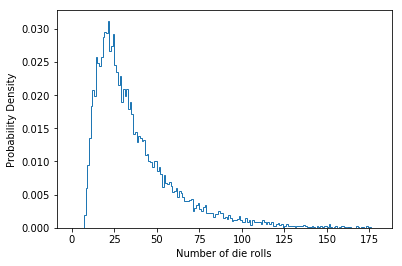

In [11]:
N = 10000
games = [one_game() for i in range(N)]

print(f"Lowest number: {np.min(games)}")
print(f"Highest number: {np.max(games)}")
print(f"Average number: {np.mean(games)}")

plt.hist(games, bins=range(180), density=True, histtype='step')
plt.xlabel('Number of die rolls')
plt.ylabel('Probability Density')
plt.show()

### Analyzing Chutes and Ladders using Markov Chains

Now that we have looked at the game using random walks, let us try to instead model it as a deterministic Markov chain. This means we define a probability vector $\vec{p}_N$, such that $p_{i, N}$ denotes the probability of being on square $i$ after $N$ steps. 

We also define a *propagator matrix* $M$, so that we can use matrix-vector multiplication to iterate our probability vector one step.

$$p_{N+1} = Mp_N$$.

#### Exercise 2d) Propagator matrix without the chutes and ladders

Let us again think of the simplest board, without any chutes and ladders. The board has 100 squares, plus the virtual "0"-square the players start in. Therefore, $p$ must be a vector with 101 elements, and $M$ must be a $101\times 101$ matrix.

Your goal is now to define this matrix $M$. The matrix must be set up so that $M_{i, j}$ (or `M[i, j]` in numpy lingo) is the probability of going from square $j$ to square $i$ in a single move.

For most squares $j$, the transition rate is fairly simple. We throw a six-sided die, and so we have a 1/6th chance of going from square $j$ to:

$$i = j+1 \quad i = j+2 \quad \ldots \quad i = j+6.$$

However, for the final squares, any "overshoot" should instead go to square 100, so you will need to handle squares 95 through 100 like special cases. Because hitting 100 is a victory, this entry should simply point back at itself, i.e., $M_{100, 100} = 1$.

Once you have defined your $M$ matrix, plot it with `plt.matshow`. You should also verify that all the columns sum to 1, otherwise we will end up with a probability vector $p$ that does not sum to 1. You can verify this with the statement
```Python
assert np.all(np.sum(M, axis=0))
```



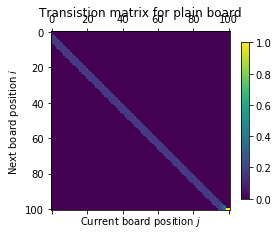

In [230]:
# Initialize matrix to 0
M = np.zeros((101, 101))

# Most of board
for i in range(95):
    M[i+1:i+7, i] = 1/6

# End of board
M[96:, 95] = 1/5
M[97:, 96] = 1/4
M[98:, 97] = 1/3
M[99:, 98] = 1/2
M[100, 99] = 1
M[100, 100] = 1

# Check all columns sum to 1
assert np.all(np.isclose(np.sum(M, axis=0), 1.0))

# Plot matrix
plt.matshow(M)
plt.xlabel('Current board position $j$')
plt.ylabel('Next board position $i$')
plt.title('Transistion matrix for plain board')
ax = plt.colorbar(shrink=0.7)
plt.show()

#### Exercise 2e) Analyzing the probability of an empty board

Now, define the probability vector $\vec{p}_0$, as the player always starts in square 0, this vector should be

$$(1, 0, 0, \ldots, 0)$$.
Now use the formula
$$\vec{p}_{N+1} = M\vec{p}_{N}.$$

to compute the next 100 probability vector. Note that to do matrix-vector multiplications in numpy, you can use `np.dot(M, p)`.

We are interested in the chance of winning. The probability of having reached the finish line after $N$ is given by $p_{100, N}$. For each iteration of your code, read out this number and append it to a list or store it in an array. 

Plot $p_{100, N}$ as a function of $N$ using `plt.step`. This curve shows the probability of winning after $n$ rounds, and will correspond to the *cumulative distribution function* of the problem.


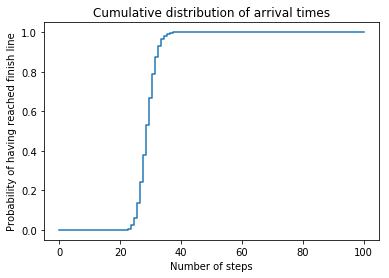

In [270]:
p = np.zeros(101)
p[0] = 1
cdf = [0]

steps = 100

for k in range(steps):
    p = np.dot(M, p)
    cdf.append(p[-1])
    
plt.step(range(steps+1), cdf, where='mid')
plt.title('Cumulative distribution of arrival times')
plt.xlabel('Number of steps');
plt.ylabel('Probability of having reached finish line')
plt.show()

#### 2f) Finiding the arrival times

The plot of the previous exercise is a *cumulative* plot, which means it shows the probability of finishing in $N$ *or more* steps. It therefore goes to 100% as $N$ grows large.

Now we instead want to plot the probability density function itself, which means the probability of finishing after *exactly* $N$ steps. The easiest way to find this is simply to take the derivative of the cumulative function.

Use `np.gradient` to take the derivative of the cumulative density function found in 2e), and then plot the derivative.

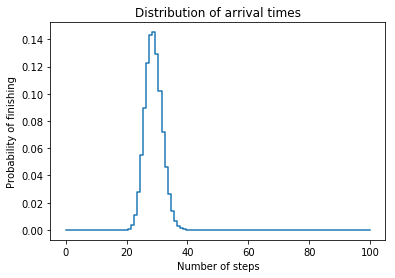

In [266]:
pdf = np.gradient(cdf)

plt.step(range(steps+1), pdf, where='mid')
plt.title('Distribution of arrival times')
plt.xlabel('Number of steps');
plt.ylabel('Probability of finishing');

####  2g) Adding the chutes and the Ladders

We now want to repeat our analysis after adding chutes and ladders to our board. The first thing you will need to do is update the propagator matrix.

First copy the empty board propagator matrix by using `M.copy()`. Then change it to reflect adding the chutes and ladders. Call your new matrix $L$. Now you only need to update $L$, and we are good to go.

Updating $L$ to add the chutes and ladders is easier than it might seem. As $M_{i, j}$ denotes the probability of going from $j$ to $i$, simply take any value that would end at the start of a chute and ladder and move that probability to the end of the chute and ladder. For example, let's say we have a ladder going from 12 to 37, then we would simply do:
```Python
L[start, :] = 0.
L[end, :] += M[start, :]
```
To add all your chutes and ladders, simply loop over them and repeat this process.

Generate the full $L$ matrix, and plot it using `plt.matshow`. Verify that all columns still add to 1.

In [267]:
L = M.copy()

for start, end in chutes.items():
    L[start, :] = 0.
    L[end, :] += M[start, :]
    
for start, end in ladders.items():
    L[start, :] = 0.
    L[end, :] += M[start, :]

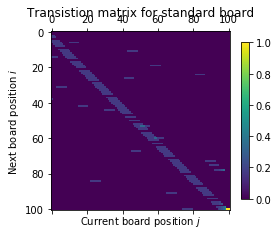

In [259]:
plt.matshow(L);
plt.xlabel('Current board position $j$');
plt.ylabel('Next board position $i$');
plt.title('Transistion matrix for standard board');
plt.colorbar(shrink=0.7);
plt.show()

#### Exercise 2h) Finding the probability distributions

Now repeat the the process of exercise 2e) and 2f), i.e., use matrix-vector multiplication to iterate $\vec{p}_{N}$ and read out the final entry: $p_{100, N}$.

Plot the cumulative distribution function, and its derivative, for the board with the chutes and ladders added.

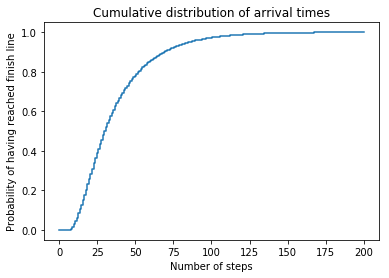

In [279]:
p = np.zeros(101)
p[0] = 1
cdf_normal = [0]

steps = 200

for k in range(steps):
    p = np.dot(L, p)
    cdf_normal.append(p[-1])
    
plt.step(range(steps+1), cdf_normal, where='mid')
plt.title('Cumulative distribution of arrival times')
plt.xlabel('Number of steps');
plt.ylabel('Probability of having reached finish line')
plt.show()

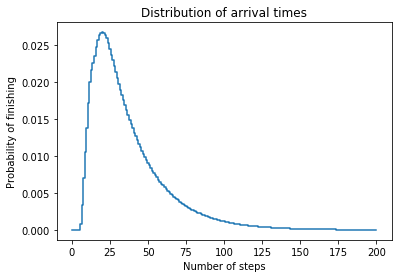

In [280]:
pdf_normal = np.gradient(cdf_normal)

plt.step(range(steps+1), pdf_normal, where='mid')
plt.title('Distribution of arrival times')
plt.xlabel('Number of steps');
plt.ylabel('Probability of finishing');

#### Exercise 2i) Compare the empty and the normal board

Now plot the two probability functions for the empty and the normal board on top of each other. What is the qualitative effect of adding chutes and ladders to the board?

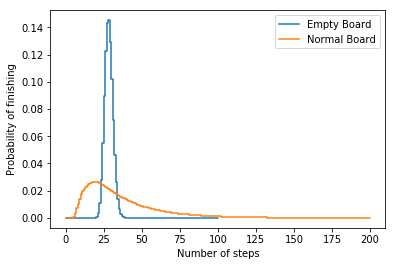

In [281]:
plt.step(range(101), pdf)
plt.step(range(201), pdf_normal)
plt.legend(['Empty Board', 'Normal Board'])
plt.xlabel('Number of steps')
plt.ylabel('Probability of finishing')
plt.show()

From the plot, we see that the probability function for the empty board is much thinner and higher, while for the normal board it is lower and more spread out. Note that because this is a probability distribution, the sum under the curve must be 1. And so the height and width of the curves are coupled.

The reason the probability of the normal board is more spread out is that addingsthe chutes and ladders is adding *variance* to the game. With the chutes and ladders we can get lucky and finish early, or we can get unlucky and psend longer to finish. This is reflected in the probability distributions.

In addition to being more spread out, the curve for the normal board has more of its weight towards the left. This means that on *average* we will tend to finish in a fewer number of rolls on the normal board than on the empty board. This means that there is a benefit to the player for having the chutes and ladders added. This is because the benefit of the ladders outweighs the negative cost of the chutes. This is probably intentional from the game designers, as having more ladders than chutes is probably more fun to those playing the game.

#### Exercise 2j) Comparing the random walk to the markov chain

Finally, compare the probability density function you found with your Markov chain, to that found from the random walks (2c), by plotting them over each other.

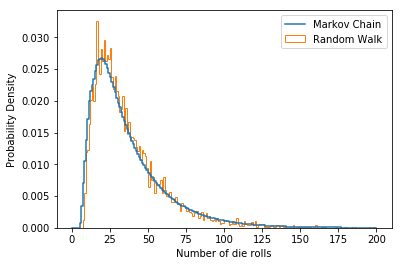

In [284]:
plt.step(range(201), pdf_normal)
plt.hist(games, bins=range(200), density=True, histtype='step')
plt.xlabel('Number of die rolls')
plt.ylabel('Probability Density')
plt.legend(['Markov Chain', 'Random Walk'])
plt.show()